In [1]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import scipy
import os
import pickle
import librosa as lr
import librosa.display
from glob import glob
import IPython
from IPython.display import Audio
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import scipy.io.wavfile as wav
# from python_speech_features import mfcc, logfbank

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
gt_data = pd.read_csv('/content/gdrive/MyDrive/DATA612 Final Project/gtzan_features_30_sec.csv')
print(gt_data.shape)
gt_data.head()

(1000, 60)


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [3]:
# checking null values
gt_data[gt_data.isna()].value_counts().sum()

0

In [3]:
our_data = pd.read_csv('/content/gdrive/MyDrive/DATA612 Final Project/top_50_songs_features.csv')
print(our_data.shape)
our_data.head()

(54, 60)


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.000000.wav,30000.000000,0.401282,0.086966,0.133645,0.009270,2285.466215,1.526304e+06,2458.856004,481152.227178,...,73.30818,-5.018557,75.411310,3.809938,43.845936,-8.759356,43.631207,-4.040365,59.195137,blues
1,blues.000001.wav,30000.000000,0.326063,0.102756,0.148318,0.031166,1207.054377,6.459471e+05,1481.555388,709502.398726,...,69.39578,-3.525022,42.324207,-1.874528,42.235626,-7.966536,44.953590,-4.028606,67.800440,blues
2,classical.00000.wav,30013.333333,0.252361,0.084149,0.036233,0.000221,1505.357460,4.443073e+04,1559.228895,43765.373123,...,86.13082,-0.318471,100.835740,1.773055,95.493810,0.888721,97.099720,-0.835078,120.920820,classical
3,country.00000.wav,30081.632653,0.383930,0.081185,0.248296,0.000716,2798.065627,3.546250e+05,2847.541181,105655.136749,...,68.59460,0.612088,54.308323,4.062127,74.348236,0.907919,68.547610,4.093193,73.602806,country
4,disco.000000.wav,30000.000000,0.383889,0.101591,0.127326,0.008411,2739.188163,1.498203e+06,2460.869989,333219.464706,...,63.21444,-10.986168,89.658240,-2.868585,70.230286,-13.567414,63.092510,-2.138512,76.132126,disco


In [4]:
# label encoding
gt_data['label'] = preprocessing.LabelEncoder().fit_transform(gt_data['label'])
our_data['label'] = preprocessing.LabelEncoder().fit_transform(our_data['label'])

In [5]:
# dividing the data into train and test sets
X_gt = gt_data.drop(['label', 'filename', 'length'], axis=1)
y_gt = gt_data['label']
X_50 = our_data.drop(['label', 'filename', 'length'], axis=1)
y_50 = our_data['label']

In [6]:
# scaling the features
transformer = preprocessing.MinMaxScaler()

X_gt_trans = transformer.fit_transform(X_gt)
X_gt = pd.DataFrame(X_gt_trans, columns = X_gt.columns)

X_50_trans = transformer.fit_transform(X_50)
X_50 = pd.DataFrame(X_50_trans, columns = X_50.columns)

In [7]:
# for training on gtzan data and testing on 50 songs
X_train = X_gt
y_train = y_gt
X_test = X_50
y_test = y_50

In [9]:
X_train.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.362279,0.695468,0.318188,0.101983,0.314117,0.040233,0.422879,0.109789,0.385532,0.102567,...,0.564186,0.112704,0.541287,0.057615,0.422444,0.082450,0.487950,0.109503,0.599189,0.078255
1,0.343622,0.793392,0.230894,0.085580,0.248405,0.121475,0.436889,0.296867,0.353329,0.342717,...,0.570198,0.120353,0.574685,0.118286,0.448184,0.102997,0.548800,0.099081,0.579640,0.075947
2,0.389832,0.640692,0.433652,0.099064,0.254261,0.049046,0.325334,0.095712,0.289224,0.088981,...,0.622467,0.081898,0.331003,0.085962,0.370988,0.116420,0.453724,0.087317,0.501381,0.045405
3,0.473508,0.777954,0.345856,0.229160,0.129376,0.058253,0.267404,0.227566,0.181068,0.171001,...,0.565151,0.091876,0.484549,0.092509,0.460684,0.068975,0.538690,0.062612,0.468060,0.048168
4,0.277759,0.681062,0.219641,0.083075,0.327270,0.110761,0.325514,0.113536,0.357017,0.180228,...,0.383289,0.200462,0.410225,0.156424,0.403875,0.120300,0.424652,0.130173,0.233047,0.094836


In [8]:
# building the model 
model = keras.Sequential()
model.add(layers.Flatten(input_shape = (57,)))
model.add(layers.Dense(256, activation ='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(128, activation ='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(64, activation ='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation ='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 57)                0         
                                                                 
 dense (Dense)               (None, 256)               14848     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

**Training the model on the gtzan data and testing on the top 50 data**

In [13]:
# compiling the model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fitting the model on the gtzan data and testing on the 50 songs data
history1 = model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 4, epochs=400)

Epoch 1/400
250/250 [==============================] - 2s 4ms/step - loss: 2.4138 - accuracy: 0.2810 - val_loss: 1.0279 - val_accuracy: 0.7778
Epoch 2/400
250/250 [==============================] - 1s 3ms/step - loss: 1.8426 - accuracy: 0.3350 - val_loss: 1.3170 - val_accuracy: 0.5741
Epoch 3/400
250/250 [==============================] - 1s 3ms/step - loss: 1.6324 - accuracy: 0.3990 - val_loss: 1.3786 - val_accuracy: 0.6111
Epoch 4/400
250/250 [==============================] - 1s 3ms/step - loss: 1.5098 - accuracy: 0.4500 - val_loss: 1.2385 - val_accuracy: 0.6481
Epoch 5/400
250/250 [==============================] - 1s 3ms/step - loss: 1.3861 - accuracy: 0.4920 - val_loss: 1.2371 - val_accuracy: 0.6667
Epoch 6/400
250/250 [==============================] - 1s 3ms/step - loss: 1.3440 - accuracy: 0.5010 - val_loss: 1.4979 - val_accuracy: 0.5926
Epoch 7/400
250/250 [==============================] - 1s 3ms/step - loss: 1.2616 - accuracy: 0.5450 - val_loss: 1.6524 - val_accuracy: 0.5741

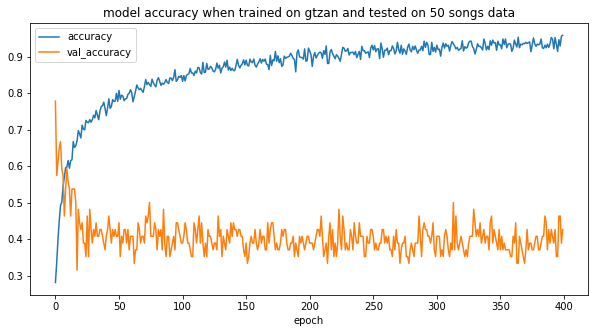

In [14]:
plt.figure(figsize=(10,5))
plt.plot(history1.history['accuracy'], label = 'accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val_accuracy')
# plt.plot(history1.history['loss'], label = 'train loss')
# plt.plot(history1.history['val_loss'], label = 'val_loss')
plt.title('model accuracy when trained on gtzan and tested on 50 songs data')
plt.xlabel('epoch')
plt.legend()
plt.show()

**Training and testing the model on the gtzan data**


In [10]:
# splitting the gtzan data into train and test sets
X_train_gt, X_test_gt, y_train_gt, y_test_gt = train_test_split(X_gt, y_gt, test_size=0.2)
X_train_gt.shape

(800, 57)

In [11]:
# compiling the model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fitting and testing the model on the gtzan data
history2 = model.fit(x = X_train_gt, y = y_train_gt, validation_data = (X_test_gt, y_test_gt), batch_size = 4, epochs=400)

Epoch 1/400
200/200 [==============================] - 2s 5ms/step - loss: 2.1827 - accuracy: 0.1988 - val_loss: 1.9225 - val_accuracy: 0.2900
Epoch 2/400
200/200 [==============================] - 1s 4ms/step - loss: 1.8068 - accuracy: 0.3275 - val_loss: 1.6964 - val_accuracy: 0.3650
Epoch 3/400
200/200 [==============================] - 1s 4ms/step - loss: 1.5796 - accuracy: 0.4238 - val_loss: 1.5269 - val_accuracy: 0.3750
Epoch 4/400
200/200 [==============================] - 1s 4ms/step - loss: 1.4758 - accuracy: 0.4313 - val_loss: 1.5160 - val_accuracy: 0.3950
Epoch 5/400
200/200 [==============================] - 1s 3ms/step - loss: 1.4178 - accuracy: 0.4375 - val_loss: 1.3988 - val_accuracy: 0.4500
Epoch 6/400
200/200 [==============================] - 1s 3ms/step - loss: 1.3078 - accuracy: 0.4963 - val_loss: 1.3455 - val_accuracy: 0.4850
Epoch 7/400
200/200 [==============================] - 1s 3ms/step - loss: 1.2708 - accuracy: 0.5100 - val_loss: 1.2576 - val_accuracy: 0.5250

In [12]:
# evaluating the model performance on the gtzan data
scores2 = model.evaluate(X_gt, y_gt, verbose=0)
print("Model Accuracy: %.2f%%" % (scores2[1]*100))

Model Accuracy: 94.80%


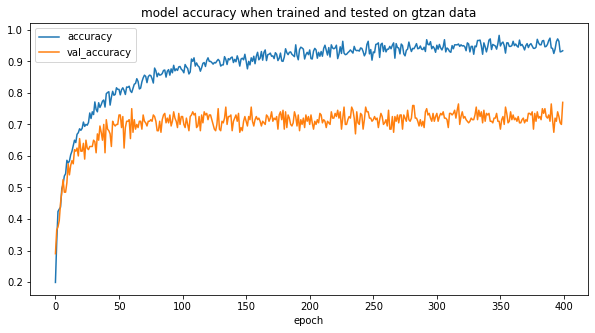

In [13]:
plt.figure(figsize=(10,5))
plt.plot(history2.history['accuracy'], label = 'accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
# plt.plot(history2.history['loss'], label = 'train loss')
# plt.plot(history2.history['val_loss'], label = 'val_loss')
plt.title('model accuracy when trained and tested on gtzan data')
plt.xlabel('epoch')
plt.legend()
plt.show()

**Training and testing the model on 50 songs data**

In [9]:
# splitting the 50 songs data into train and test sets
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(X_50, y_50, test_size=0.2)
X_train_50.shape

(43, 57)

In [10]:
# compiling the model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fitting the model on the 50 songs data
history3 = model.fit(x = X_train_50, y = y_train_50, validation_data = (X_test_50, y_test_50), batch_size=4, epochs=800)

Epoch 1/800
11/11 [==============================] - 1s 29ms/step - loss: 1.9295 - accuracy: 0.4419 - val_loss: 1.5462 - val_accuracy: 0.6364
Epoch 2/800
11/11 [==============================] - 0s 6ms/step - loss: 1.5698 - accuracy: 0.6279 - val_loss: 1.4205 - val_accuracy: 0.6364
Epoch 3/800
11/11 [==============================] - 0s 8ms/step - loss: 1.3159 - accuracy: 0.6279 - val_loss: 1.5231 - val_accuracy: 0.6364
Epoch 4/800
11/11 [==============================] - 0s 7ms/step - loss: 1.2813 - accuracy: 0.6047 - val_loss: 1.6140 - val_accuracy: 0.6364
Epoch 5/800
11/11 [==============================] - 0s 6ms/step - loss: 1.2702 - accuracy: 0.6279 - val_loss: 1.6023 - val_accuracy: 0.6364
Epoch 6/800
11/11 [==============================] - 0s 6ms/step - loss: 1.2003 - accuracy: 0.6047 - val_loss: 1.5589 - val_accuracy: 0.6364
Epoch 7/800
11/11 [==============================] - 0s 8ms/step - loss: 1.1114 - accuracy: 0.6279 - val_loss: 1.6763 - val_accuracy: 0.6364
Epoch 8/800


In [11]:
# evaluating the model performance on the 50 songs data
scores3 = model.evaluate(X_50, y_50, verbose=0)
print("Model Accuracy: %.2f%%" % (scores3[1]*100))

Model Accuracy: 88.89%


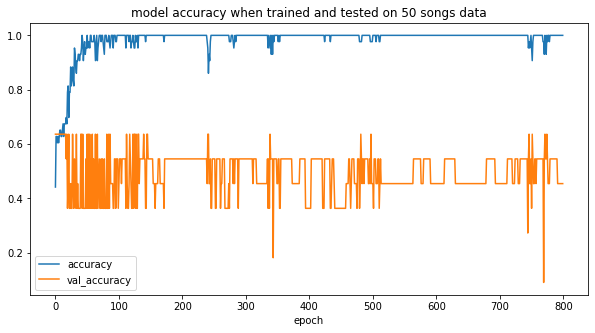

In [12]:
plt.figure(figsize=(10,5))
plt.plot(history3.history['accuracy'], label = 'accuracy')
plt.plot(history3.history['val_accuracy'], label = 'val_accuracy')
# plt.plot(history3.history['loss'], label = 'train loss')
# plt.plot(history3.history['val_loss'], label = 'val_loss')
plt.title('model accuracy when trained and tested on 50 songs data')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [80]:
# building the model without dropout
model3 = keras.Sequential()
model3.add(layers.Flatten(input_shape = (57,)))
model3.add(layers.Dense(256, activation ='relu'))
# model3.add(layers.Dropout(0.25))
model3.add(layers.Dense(128, activation ='relu'))
# model3.add(layers.Dropout(0.25))
model3.add(layers.Dense(64, activation ='relu'))
# model3.add(layers.Dropout(0.25))
model3.add(layers.Dense(10, activation ='softmax'))
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 57)                0         
                                                                 
 dense_12 (Dense)            (None, 256)               14848     
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 10)                650       
                                                                 
Total params: 56,650
Trainable params: 56,650
Non-trainable params: 0
_________________________________________________________________


In [81]:
# compiling the model
model3.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fitting the model on the 50 songs data
history32 = model3.fit(x = X_train_50, y = y_train_50, validation_data = (X_test_50, y_test_50), epochs=800)

Epoch 1/800
2/2 [==============================] - 1s 180ms/step - loss: 2.4449 - accuracy: 0.0000e+00 - val_loss: 2.1544 - val_accuracy: 0.0909
Epoch 2/800
2/2 [==============================] - 0s 27ms/step - loss: 2.1698 - accuracy: 0.2558 - val_loss: 1.9285 - val_accuracy: 0.7273
Epoch 3/800
2/2 [==============================] - 0s 29ms/step - loss: 1.9604 - accuracy: 0.6047 - val_loss: 1.6721 - val_accuracy: 0.7273
Epoch 4/800
2/2 [==============================] - 0s 30ms/step - loss: 1.7666 - accuracy: 0.6047 - val_loss: 1.4202 - val_accuracy: 0.7273
Epoch 5/800
2/2 [==============================] - 0s 27ms/step - loss: 1.5817 - accuracy: 0.6047 - val_loss: 1.2264 - val_accuracy: 0.7273
Epoch 6/800
2/2 [==============================] - 0s 37ms/step - loss: 1.4880 - accuracy: 0.6047 - val_loss: 1.1441 - val_accuracy: 0.7273
Epoch 7/800
2/2 [==============================] - 0s 32ms/step - loss: 1.4731 - accuracy: 0.6047 - val_loss: 1.1499 - val_accuracy: 0.7273
Epoch 8/800
2/2

In [82]:
# evaluating the model performance on the 50 songs data (without dropout)
scores32 = model3.evaluate(X_50, y_50, verbose=0)
print("Model Accuracy: %.2f%%" % (scores3[1]*100))

Model Accuracy: 90.74%
